In [2]:
%matplotlib inline

In [98]:
import sys
sys.path.insert(0, "../script/")
sys.path.insert(0, "../cluster/")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#import seaborn as sns
#sns.set(color_codes=True)
from sklearn import linear_model
import numpy as np
from pageCluster import pageCluster

In [102]:
sitelist = ["asp","rottentomatoes","douban","hupu","youtube","stackexchange"]
date = "July30"
sitemap = 100
#sitelist = ["asp"]
feat_dict = {}
for site in sitelist:
    feat_dict[site] = []
    with open("./July30/feature/{}/".format(sitemap) + site + "/log_tf_idf.txt") as fin:
    #with open("./crawling/May1/feature/"+ site +"/log_tf_idf.txt") as fin:
        for line in fin:
            _, vector = line.strip().split(':')
            vector = [float(x) for x in vector.split()]
            feat_dict[site].append(vector)
    feat_dict[site] = np.asarray(feat_dict[site])

number of feats  182
11 num_bins
[ 0.          0.04048045  0.0809609   0.12144135  0.1619218   0.20240225
  0.2428827   0.28336316  0.32384361  0.36432406  0.40480451  0.44528496]
[ 53.   6.   1.  15.   7.   8.   2.   1.   1.   5.   1.] n is 


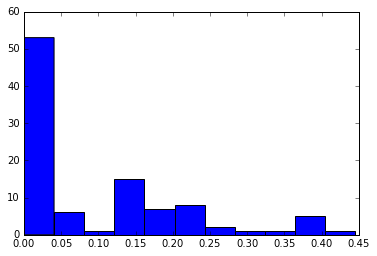

100
0.0809609016436


In [104]:
site="asp"
X = feat_dict[site]

X = normalize(X, norm='l1')
num_feat = len(X[0])
print "number of feats ", num_feat

K = 90
kdist_list = []
nbrs = NearestNeighbors(n_neighbors=K, algorithm="ball_tree").fit(X)
distances, indices = nbrs.kneighbors(X)
for dist in distances:
    kdist_list += dist.tolist()[4:5]


for index, value in enumerate(kdist_list):
    if value > 0.10:
        value = value
        #print index, value
        
factor = 16.0
num_bins = int(num_feat/factor)
print num_bins, "num_bins"
n, bins, _ = plt.hist(kdist_list, bins=num_bins)
#n, bins = np.histogram(kdist_list, bins=num_bins)
line1 = plt.plot(4,color="r",label="question_tf-idf")

print bins
print n, "n is "
# plt.yscale('log')
plt.show()

y = np.array([np.log(x) if x > 0 else 0 for x in n])
x = np.array(bins[1:]).reshape(-1, 1)
threshold = np.mean(n[100/3:])
threshold = 4
print X.shape[0]
total = 0
for idx, val in enumerate(n):
    total += val
    if val < threshold:
        eps = bins[idx]
        if total > 0.5 * X.shape[0]:
            break
print eps

In [103]:
num_clusters = -1
cluster_labels = pageCluster(site,date,"../Crawler/{}_samples/{}/{}/".format(date,sitemap,site),num_clusters,sitemap, debug=True)

debug mode  True stackexchange
../Crawler/July30_samples/100/stackexchange/ stackexchange July30  creating allPages 
debug for pageCluster
num_samples 100 <type 'int'>
./July30/feature/100/stackexchange feat folder
../Crawler/July30_samples/100/stackexchange/ folder Path list
our dataset is stackexchange
annotation starts
write mode !
98


In [72]:
features_type = "log-tf-idf"
cluster_labels.DBSCAN(features_type, cv=False,eps_val=eps)
cluster_labels.Evaluation(site,"DBSCAN",features_type)

The feature is log-tf-idf with DBSCAN
the size of vector is (200, 625)
the size of vector is (200, 625)
eps is 0.0842813890165
number of -1 13
we have number of classes from ground truth is 4
we have number of classes from clusters is 8
Outlier: Cover 13 of 13 total ground truth, and create 24 outlier in prediction. 
We have 187 pages for ground truth!
We have 187 pages after prediction!
ground truth data
cluster No. is 0 ->{  '0': 31,   }
cluster No. is 1 ->{  '0': 8,   }
cluster No. is 2 ->{  '0': 4,   }
cluster No. is 3 ->{  '1': 20,   }
cluster No. is 4 ->{  '0': 4,   }
cluster No. is 5 ->{  '0': 8,   }
cluster No. is 6 ->{  '6': 67,   }
cluster No. is 7 ->{  '6': 21,   }
cluster No. is -1 ->{  '0': 24,   }
Mutual Info Score is 0.505662069321
Adjusted Rand Score is 0.523872041126
Micro F-Measure is 0.751896749102
Macro F-Measure is 0.809384164223
Micro Precision is 1.0
Macro Precision is 1.0


(0.7518967491022003,
 0.809384164222874,
 1.0,
 1.0,
 0.50566206932084012,
 0.5238720411257823)